<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week7_Tugas_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
# @title Import Library

import numpy as np
import math
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
# @title Function konvolusi

def convolution2d(image, kernel, stride, padding):
  # Menambahkan padding pada citra
  if padding > 0:
    image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

  # Inisialisasi ukuran img dan kernel
  img_height, img_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # Melakukan perhitungan ukuran citra output
  output_height = (img_height - kernel_height) // stride + 1
  output_width = (img_width - kernel_width) // stride + 1

  # Melakukan inisialisasi citra output yang baru
  output = np.zeros((output_height, output_width))

  # Melakukan perhitungan kernel terhadap citra
  for i in range(0, output_height):
    for j in range(0, output_width):
      # Menentukan region untuk citra yang ingin dilakukan konvolusi
      region_konvolusi = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]

      # Melakukan perhitungan perkalian wise
      output[i, j] = np.sum(region_konvolusi * kernel)

  return output

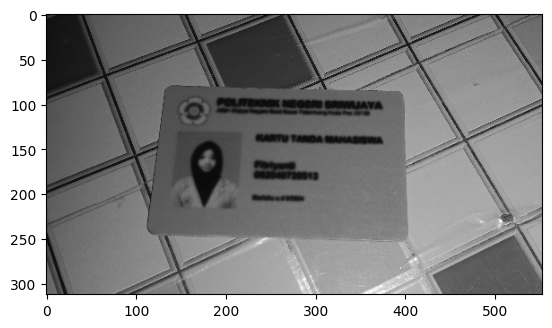

In [111]:
# @title Load image

img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/3I_2341729016_3 - Fitri yanti.jpg')
img = cv.resize(img, (0, 0), fx=0.2, fy=0.2)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

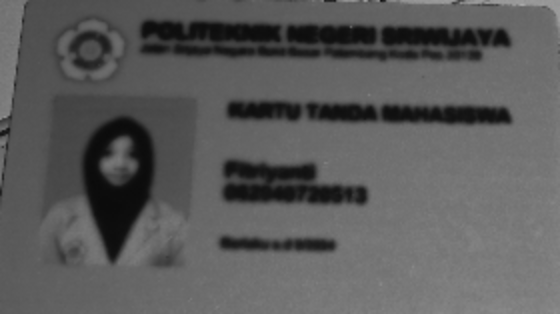

In [66]:
# @title Melakukan cropping image & cvt grayscale

img_crop = img[83:240, 120:400]
img_crop = cv.cvtColor(img_crop, cv.COLOR_BGR2GRAY)
img_crop_resize = cv.resize(img_crop, (0, 0), fx=2, fy=2)
cv2_imshow(img_crop_resize)

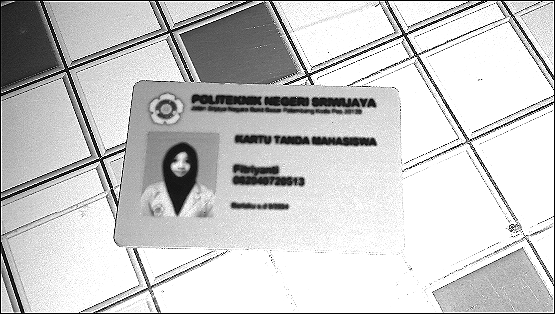

In [162]:
# @title Melakukan sharpening img menggunakan citra asli tanpa cropping

kernel_sharpen = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])

img_sharpen_ori = convolution2d(img, kernel_sharpen, 1, 2)
img_sharpen_ori = np.clip(img_sharpen_ori, 0, 255).astype('uint8')
cv2_imshow(img_sharpen_ori)

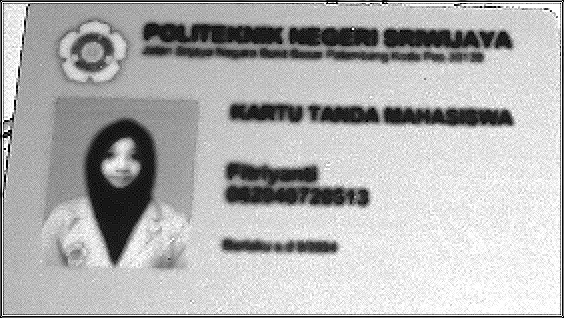

In [163]:
# @title Melakukan sharpening img menggunakan citra yang sudah dilakukan cropping

kernel_sharpen_strong = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img_sharpen_cropped = convolution2d(img_crop_resize, kernel_sharpen_strong, 1, 2)
img_sharpen_cropped = convolution2d(img_sharpen_cropped, kernel_sharpen, 1, 2)
img_sharpen_cropped = np.clip(img_sharpen_cropped, 0, 255).astype('uint8')
cv2_imshow(img_sharpen_cropped)

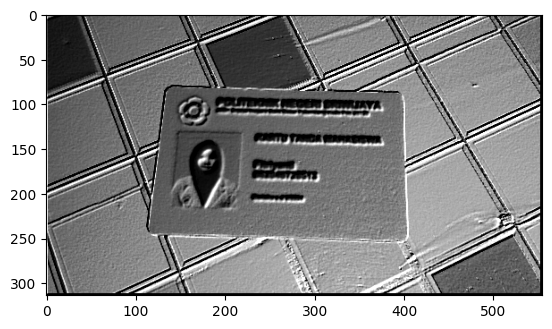

In [145]:
# @title Melakukan embossed image

kernel_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

img_emboss = convolution2d(img, kernel_emboss, 1, 2)
# img_emboss = cv.filter2D(img_sharpen_ori, -1, kernel_emboss)
img_emboss = np.clip(img_emboss, 0, 255).astype('uint8')
plt.imshow(img_emboss, cmap='gray')

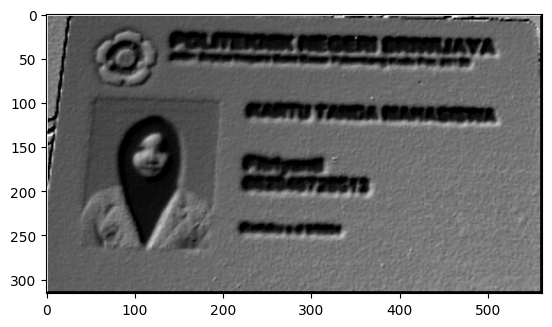

In [166]:
# @title Melakukan embossed image menggunakan cropped image

kernel_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

img_emboss_cropped = convolution2d(img_crop_resize, kernel_emboss, 1, 2)
img_emboss_cropped = np.clip(img_emboss_cropped, 0, 255).astype('uint8')
plt.imshow(img_emboss_cropped, cmap='gray')

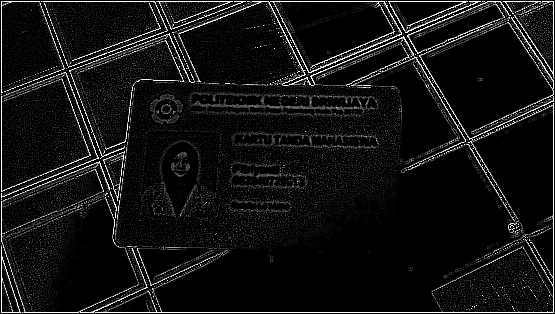

In [164]:
# @title Melakukan canny edge

kernel_canny_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

img_contrast = cv.convertScaleAbs(img, alpha=1.7, beta=50)

img_canny = convolution2d(img_contrast, kernel_canny_edge, 1, 2)
img_canny = np.clip(img_canny, 0, 255).astype('uint8')
cv2_imshow(img_canny)

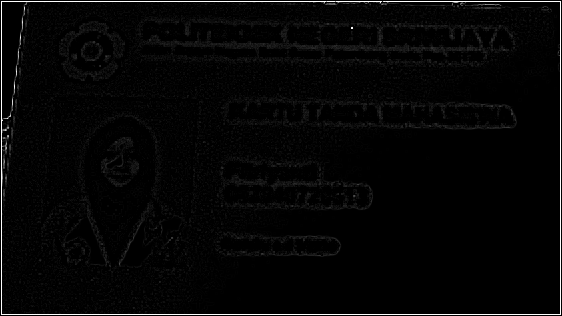

In [181]:
# @title Melakukan canny edge menggunakan cropped image

kernel_canny_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

img_contrast = cv.convertScaleAbs(img_crop_resize, alpha=1.8, beta=60)

img_canny_cropped = convolution2d(img_contrast, kernel_canny_edge, 1, 2)
img_canny_cropped = np.clip(img_canny_cropped, 0, 255).astype('uint8')
cv2_imshow(img_canny_cropped)

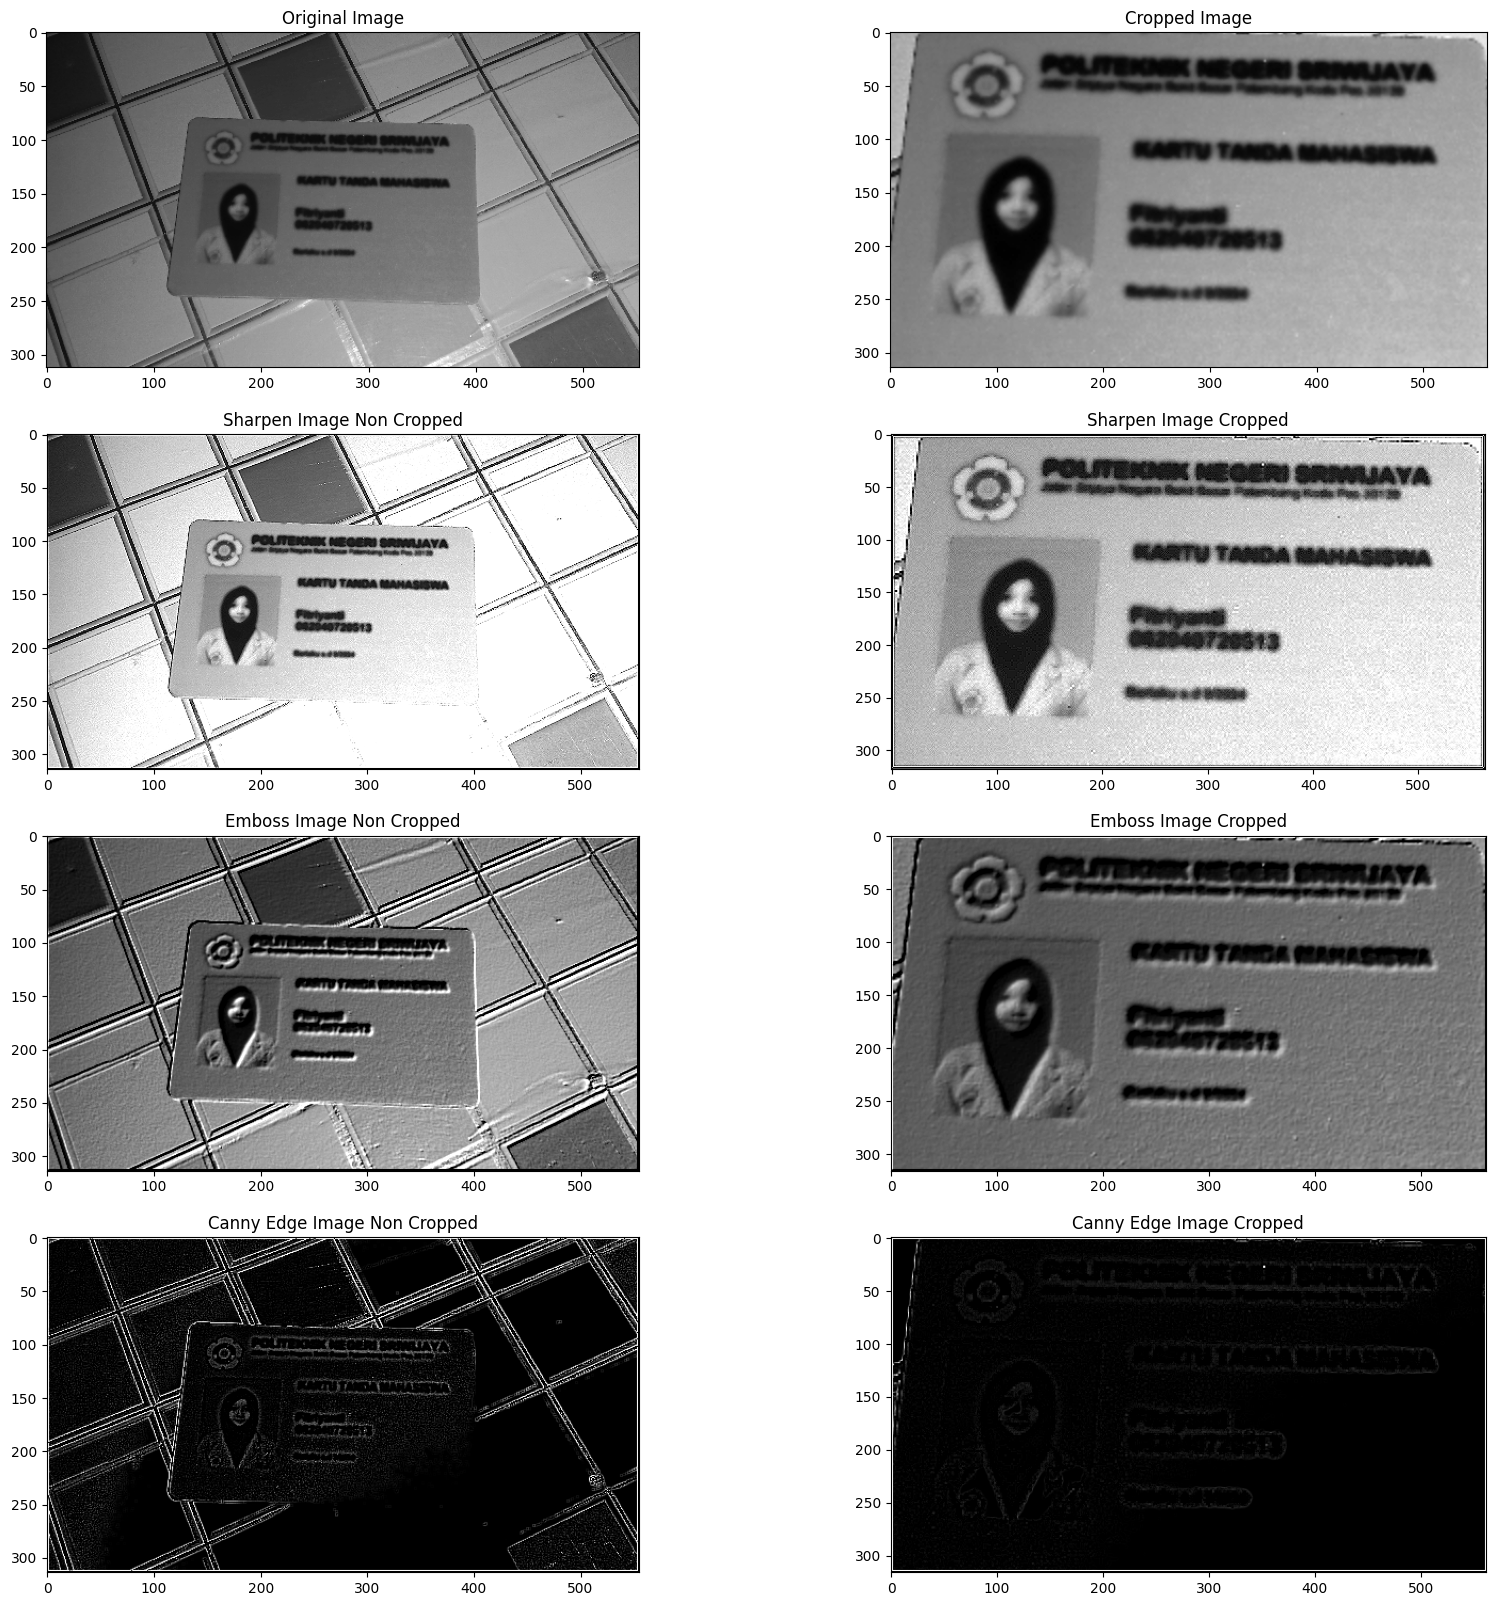

In [185]:
# @title Menampilkan keseluruhan image

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title("Original Image")

ax[0, 1].imshow(img_crop_resize, cmap='gray')
ax[0, 1].set_title("Cropped Image")

ax[1, 0].imshow(img_sharpen_ori, cmap='gray')
ax[1, 0].set_title("Sharpen Image Non Cropped")

ax[1, 1].imshow(img_sharpen_cropped, cmap='gray')
ax[1, 1].set_title("Sharpen Image Cropped")

ax[2, 0].imshow(img_emboss, cmap='gray')
ax[2, 0].set_title("Emboss Image Non Cropped")

ax[2, 1].imshow(img_emboss_cropped, cmap='gray')
ax[2, 1].set_title("Emboss Image Cropped")

ax[3, 0].imshow(img_canny, cmap='gray')
ax[3, 0].set_title("Canny Edge Image Non Cropped")

ax[3, 1].imshow(img_canny_cropped, cmap='gray')
ax[3, 1].set_title("Canny Edge Image Cropped")

plt.show()